##Renewable Energy Data Analysis - Exploratory Data Analysis

*   Dataset: merged_renewable_data.csv
*   Analysis includes solar (DNI, GHI, Tilt) and wind speed data across US cities



In [42]:
# SECTION 1: IMPORTING LIBRARIES AND LOADING DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Set visualization style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Load the dataset
df = pd.read_csv('merged_renewable_data 1.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 2450 rows × 17 columns


In [43]:
# SECTION 2: INITIAL DATA EXPLORATION

# First look at the data structure
print("FIRST 5 ROWS OF THE DATASET")
df.head()

FIRST 5 ROWS OF THE DATASET


,Unnamed: 0,country,state,city_x,lat,lon,wind_speed_50m,wind_speed_100m,wind_speed_150m,region,city_y,latitude,longitude,annual_dni,annual_ghi,annual_tilt,collection_date
0,0,USA,Alabama,Birmingham,33.5186,-86.8104,4.383841,5.599855,6.480053,Alabama,Birmingham,33.5186,-86.8104,"{'annual': 4.24, 'monthly': {'jan': 3.71, 'feb...","{'annual': 4.45, 'monthly': {'jan': 2.54, 'feb...","{'annual': 5.0, 'monthly': {'jan': 3.93, 'feb'...",2025-09-01T19:24:08.288
1,0,USA,Alabama,Birmingham,33.5186,-86.8104,4.383841,5.599855,6.480053,Arizona,Phoenix,33.4484,-112.0740,"{'annual': 7.35, 'monthly': {'jan': 6.24, 'feb...","{'annual': 5.78, 'monthly': {'jan': 3.46, 'feb...","{'annual': 6.68, 'monthly': {'jan': 5.73, 'feb...",2025-09-01T19:24:18.603
2,0,USA,Alabama,Birmingham,33.5186,-86.8104,4.383841,5.599855,6.480053,Arkansas,Little Rock,34.7465,-92.2896,"{'annual': 4.37, 'monthly': {'jan': 3.36, 'feb...","{'annual': 4.41, 'monthly': {'jan': 2.37, 'feb...","{'annual': 4.97, 'monthly': {'jan': 3.7, 'feb'...",2025-09-01T19:24:23.896
3,0,USA,Alabama,Birmingham,33.5186,-86.8104,4.383841,5.599855,6.480053,California,Los Angeles,34.0522,-118.2437,"{'annual': 5.72, 'monthly': {'jan': 4.51, 'feb...","{'annual': 5.3, 'monthly': {'jan': 3.06, 'feb'...","{'annual': 6.06, 'monthly': {'jan': 4.88, 'feb...",2025-09-01T19:24:29.019
4,0,USA,Alabama,Birmingham,33.5186,-86.8104,4.383841,5.599855,6.480053,Colorado,Denver,39.7392,-104.9903,"{'annual': 6.12, 'monthly': {'jan': 5.01, 'feb...","{'annual': 4.83, 'monthly': {'jan': 2.51, 'feb...","{'annual': 5.85, 'monthly': {'jan': 4.79, 'feb...",2025-09-01T19:24:34.031


In [44]:
df.head()

,Unnamed: 0,country,state,city_x,lat,lon,wind_speed_50m,wind_speed_100m,wind_speed_150m,region,city_y,latitude,longitude,annual_dni,annual_ghi,annual_tilt,collection_date
0,0,USA,Alabama,Birmingham,33.5186,-86.8104,4.383841,5.599855,6.480053,Alabama,Birmingham,33.5186,-86.8104,"{'annual': 4.24, 'monthly': {'jan': 3.71, 'feb...","{'annual': 4.45, 'monthly': {'jan': 2.54, 'feb...","{'annual': 5.0, 'monthly': {'jan': 3.93, 'feb'...",2025-09-01T19:24:08.288
1,0,USA,Alabama,Birmingham,33.5186,-86.8104,4.383841,5.599855,6.480053,Arizona,Phoenix,33.4484,-112.0740,"{'annual': 7.35, 'monthly': {'jan': 6.24, 'feb...","{'annual': 5.78, 'monthly': {'jan': 3.46, 'feb...","{'annual': 6.68, 'monthly': {'jan': 5.73, 'feb...",2025-09-01T19:24:18.603
2,0,USA,Alabama,Birmingham,33.5186,-86.8104,4.383841,5.599855,6.480053,Arkansas,Little Rock,34.7465,-92.2896,"{'annual': 4.37, 'monthly': {'jan': 3.36, 'feb...","{'annual': 4.41, 'monthly': {'jan': 2.37, 'feb...","{'annual': 4.97, 'monthly': {'jan': 3.7, 'feb'...",2025-09-01T19:24:23.896
3,0,USA,Alabama,Birmingham,33.5186,-86.8104,4.383841,5.599855,6.480053,California,Los Angeles,34.0522,-118.2437,"{'annual': 5.72, 'monthly': {'jan': 4.51, 'feb...","{'annual': 5.3, 'monthly': {'jan': 3.06, 'feb'...","{'annual': 6.06, 'monthly': {'jan': 4.88, 'feb...",2025-09-01T19:24:29.019
4,0,USA,Alabama,Birmingham,33.5186,-86.8104,4.383841,5.599855,6.480053,Colorado,Denver,39.7392,-104.9903,"{'annual': 6.12, 'monthly': {'jan': 5.01, 'feb...","{'annual': 4.83, 'monthly': {'jan': 2.51, 'feb...","{'annual': 5.85, 'monthly': {'jan': 4.79, 'feb...",2025-09-01T19:24:34.031


In [45]:
# Check column names and data types
print("\n")
print("DATASET INFO")
print("\n")
df.info()



DATASET INFO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2450 non-null   int64  
 1   country          2450 non-null   object 
 2   state            2450 non-null   object 
 3   city_x           2450 non-null   object 
 4   lat              2450 non-null   float64
 5   lon              2450 non-null   float64
 6   wind_speed_50m   2450 non-null   float64
 7   wind_speed_100m  2450 non-null   float64
 8   wind_speed_150m  2450 non-null   float64
 9   region           2450 non-null   object 
 10  city_y           2450 non-null   object 
 11  latitude         2450 non-null   float64
 12  longitude        2450 non-null   float64
 13  annual_dni       2450 non-null   object 
 14  annual_ghi       2450 non-null   object 
 15  annual_tilt      2450 non-null   object 
 16  collection_date  2450 non-null   object 
dt

In [46]:
# Basic statistics for numerical columns

print("DESCRIPTIVE STATISTICS")
print("\n")
df.describe()

DESCRIPTIVE STATISTICS




,Unnamed: 0,lat,lon,wind_speed_50m,wind_speed_100m,wind_speed_150m,latitude,longitude
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,24.500000,39.236154,-93.251254,4.764043,5.856897,6.634445,38.787543,-92.095151
std,14.433816,5.975951,19.014612,0.861250,1.043028,1.199347,5.135572,17.380396
min,0.000000,21.306900,-157.858300,2.729708,3.239860,3.515350,21.306900,-157.858300
25%,12.000000,35.227100,-104.820200,4.403326,5.492570,6.254423,35.227100,-97.516400
50%,24.500000,39.860500,-88.989000,4.708924,5.871932,6.735197,39.768400,-87.906500
75%,37.000000,42.360100,-79.931100,5.403001,6.683126,7.490580,42.331400,-79.931100
max,49.000000,61.218100,-70.256800,6.335932,7.721314,8.684630,47.606200,-70.256800


In [47]:
# SECTION 3: DATA QUALITY ASSESSMENT
# Check for missing values
print("\n" )
print("MISSING VALUES ANALYSIS")
print("\n")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))



MISSING VALUES ANALYSIS


Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


In [48]:
# Check for duplicate rows
print("\n")
print("DUPLICATE ROWS CHECK")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\nSample of duplicate entries:")
    print(df[df.duplicated(keep=False)].sort_values(['country', 'state', 'city']).head(10))



DUPLICATE ROWS CHECK
Number of duplicate rows: 0


In [49]:
# Look at unique values in categorical columns
print("\n")
print("UNIQUE VALUES IN CATEGORICAL COLUMNS")
print("\n")
categorical_cols = ['country', 'region', 'city', 'state']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}: {df[col].nunique()} unique values")
        print(f"Sample values: {df[col].unique()[:5]}")



UNIQUE VALUES IN CATEGORICAL COLUMNS



country: 1 unique values
Sample values: ['USA']

region: 49 unique values
Sample values: ['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado']

state: 50 unique values
Sample values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California']


In [50]:
# SECTION 4: HANDLING JSON-LIKE STRING COLUMNS
# The solar data columns contain JSON strings - we need to parse them
print("\n")
print("PARSING JSON COLUMNS")
print("\n")

# Function to safely extract annual values from JSON strings
def extract_annual_value(json_str):
    try:
        if pd.isna(json_str):
            return np.nan
        data = json.loads(json_str.replace("'", '"'))
        return data.get('annual', np.nan)
    except:
        return np.nan



PARSING JSON COLUMNS




In [51]:
# Create new columns with extracted annual values
solar_cols = ['annual_dni', 'annual_ghi', 'annual_tilt']
json_cols = [col for col in df.columns if col in solar_cols]

for col in json_cols:
    new_col_name = f'{col}_value'
    df[new_col_name] = df[col].apply(extract_annual_value)
    print(f"Extracted annual values from {col} → {new_col_name}")

print("\nNew columns created successfully!")

Extracted annual values from annual_dni → annual_dni_value
Extracted annual values from annual_ghi → annual_ghi_value
Extracted annual values from annual_tilt → annual_tilt_value

New columns created successfully!


In [52]:
# SECTION 5: DATA CLEANING
# Drop the Unnamed column if it exists (likely an index column)
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("Dropped 'Unnamed: 0' column")

# Handle duplicates - keep first occurrence
initial_rows = len(df)
df = df.drop_duplicates(keep='first')
removed_rows = initial_rows - len(df)
print(f"\nRemoved {removed_rows} duplicate rows")

Dropped 'Unnamed: 0' column

Removed 0 duplicate rows


In [53]:
df['avg_wind_speed'] = df[['wind_speed_50m', 'wind_speed_100m', 'wind_speed_150m']].mean(axis=1)
# Check for any obviously incorrect values (negative wind speeds, etc.)
numeric_cols = ['wind_speed_50m', 'wind_speed_100m', 'wind_speed_150m', 'avg_wind_speed',
                'annual_dni_value', 'annual_ghi_value', 'annual_tilt_value']

print("\nChecking for negative values in numerical columns:")
for col in numeric_cols:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"{col}: {negative_count} negative values found")


Checking for negative values in numerical columns:


In [54]:
# SECTION 6: DESCRIPTIVE STATISTICS
print("\n" )
print("DETAILED STATISTICS FOR KEY VARIABLES")
print("\n")

# Wind speed statistics
wind_cols = ['wind_speed_50m', 'wind_speed_100m', 'wind_speed_150m']
print("\nWIND SPEED STATISTICS (m/s):")
print(df[wind_cols].describe().round(2))

# Solar radiation statistics
solar_value_cols = ['annual_dni_value', 'annual_ghi_value', 'annual_tilt_value']
print("\nSOLAR RADIATION STATISTICS (kWh/m²/day):")
print(df[solar_value_cols].describe().round(2))



DETAILED STATISTICS FOR KEY VARIABLES



WIND SPEED STATISTICS (m/s):
       wind_speed_50m  wind_speed_100m  wind_speed_150m
count         2450.00          2450.00          2450.00
mean             4.76             5.86             6.63
std              0.86             1.04             1.20
min              2.73             3.24             3.52
25%              4.40             5.49             6.25
50%              4.71             5.87             6.74
75%              5.40             6.68             7.49
max              6.34             7.72             8.68

SOLAR RADIATION STATISTICS (kWh/m²/day):
       annual_dni_value  annual_ghi_value  annual_tilt_value
count           2450.00           2450.00            2450.00
mean               4.56              4.31               4.99
std                1.01              0.56               0.61
min                3.35              3.46               3.98
25%                3.88              3.89               4.57
50%             

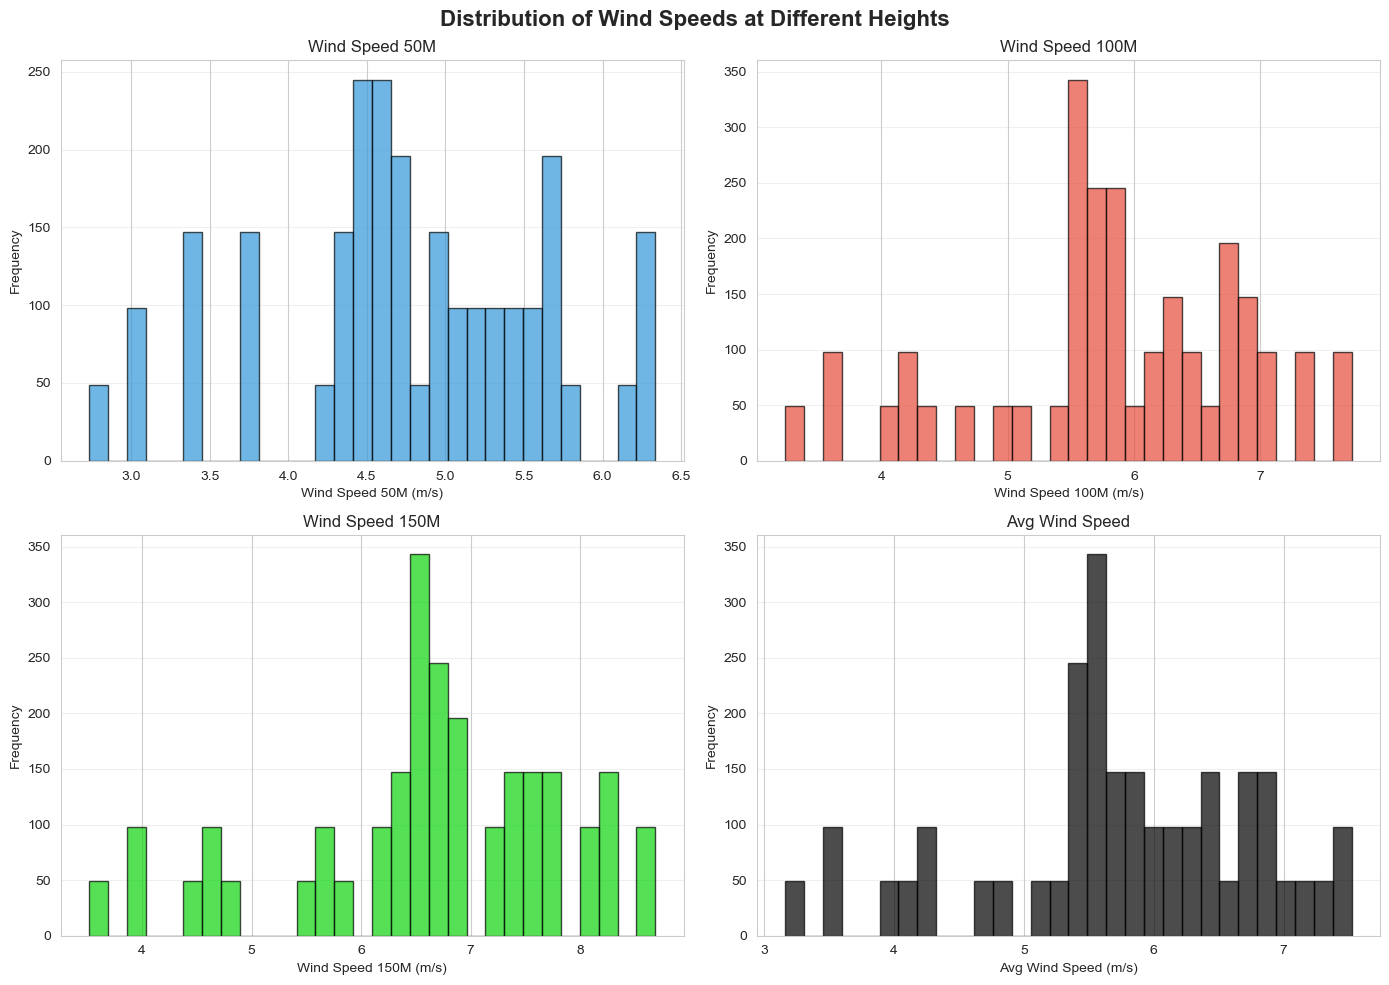

In [55]:
# SECTION 7: UNIVARIATE ANALYSIS - DISTRIBUTIONS
# Distribution of wind speeds at different heights
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Wind Speeds at Different Heights', fontsize=16, fontweight='bold')

wind_cols = ['wind_speed_50m', 'wind_speed_100m', 'wind_speed_150m', 'avg_wind_speed']
colors = ['#3498db', '#e74c3c', "#0DD40D", '#000000']

for idx, (col, color) in enumerate(zip(wind_cols, colors)):
    row = idx // 2
    col_idx = idx % 2

    # Histogram with KDE
    axes[row, col_idx].hist(df[col].dropna(), bins=30, alpha=0.7, color=color, edgecolor='black')
    axes[row, col_idx].set_xlabel(f'{col.replace("_", " ").title()} (m/s)')
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].set_title(f'{col.replace("_", " ").title()}')
    axes[row, col_idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

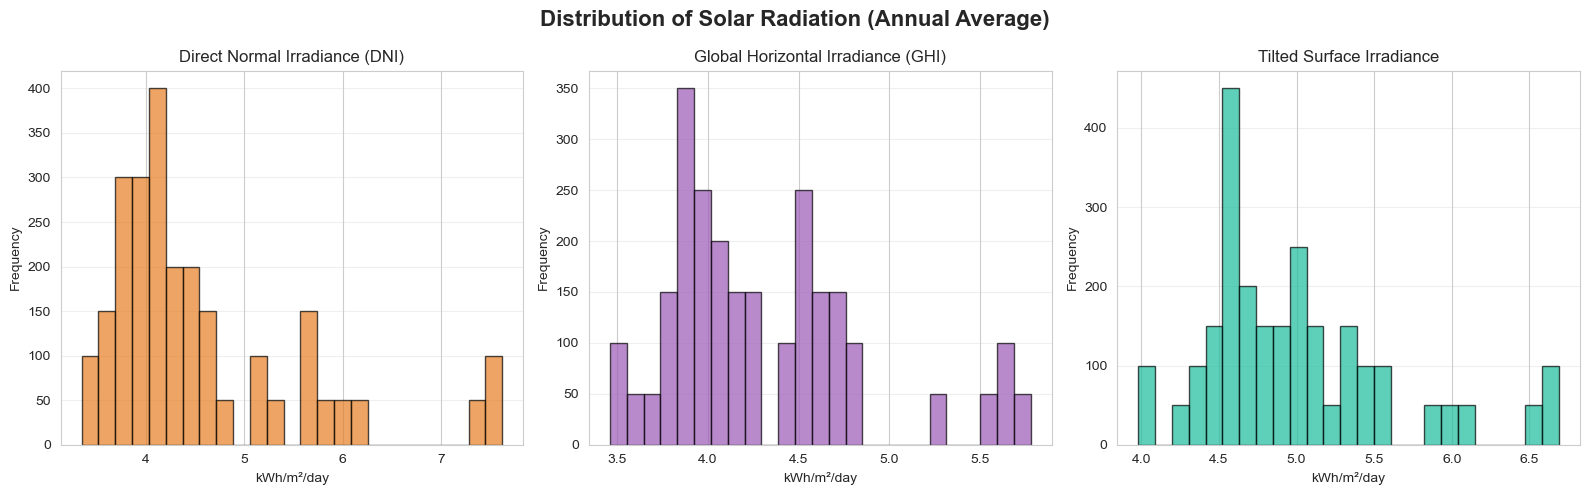

In [56]:
# Distribution of solar radiation values
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Distribution of Solar Radiation (Annual Average)', fontsize=16, fontweight='bold')

solar_cols = ['annual_dni_value', 'annual_ghi_value', 'annual_tilt_value']
solar_titles = ['Direct Normal Irradiance (DNI)', 'Global Horizontal Irradiance (GHI)',
                'Tilted Surface Irradiance']
colors = ['#e67e22', '#9b59b6', '#1abc9c']

for idx, (col, title, color) in enumerate(zip(solar_cols, solar_titles, colors)):
    axes[idx].hist(df[col].dropna(), bins=25, alpha=0.7, color=color, edgecolor='black')
    axes[idx].set_xlabel('kWh/m²/day')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(title)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


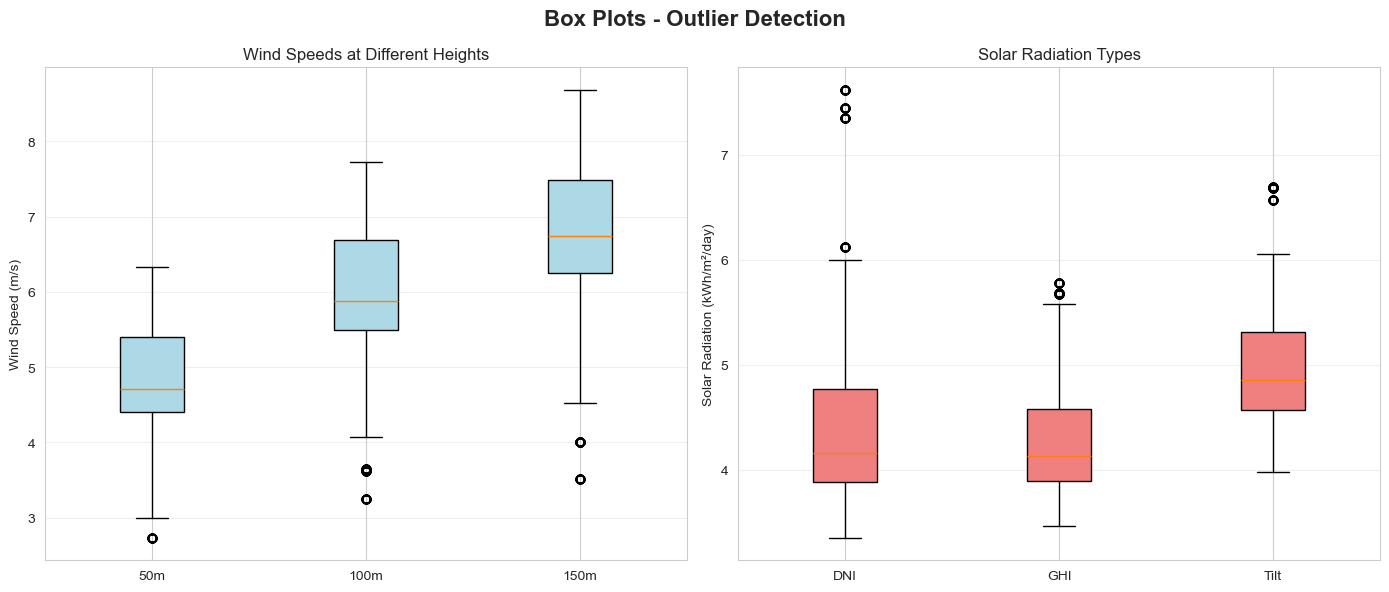

In [57]:
# Box plots to identify outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold')

# Wind speeds
wind_data = df[['wind_speed_50m', 'wind_speed_100m', 'wind_speed_150m']].dropna()
axes[0].boxplot([wind_data['wind_speed_50m'], wind_data['wind_speed_100m'],
                 wind_data['wind_speed_150m']],
                labels=['50m', '100m', '150m'],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
axes[0].set_ylabel('Wind Speed (m/s)')
axes[0].set_title('Wind Speeds at Different Heights')
axes[0].grid(axis='y', alpha=0.3)

# Solar radiation
solar_data = df[['annual_dni_value', 'annual_ghi_value', 'annual_tilt_value']].dropna()
axes[1].boxplot([solar_data['annual_dni_value'], solar_data['annual_ghi_value'],
                 solar_data['annual_tilt_value']],
                labels=['DNI', 'GHI', 'Tilt'],
                patch_artist=True,
                boxprops=dict(facecolor='lightcoral'))
axes[1].set_ylabel('Solar Radiation (kWh/m²/day)')
axes[1].set_title('Solar Radiation Types')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

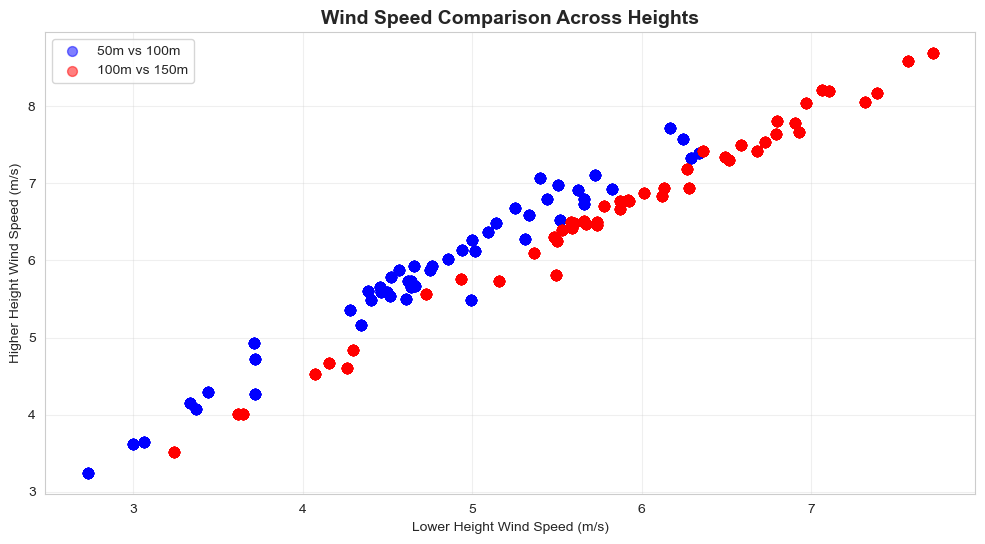

In [58]:
# SECTION 8: BIVARIATE ANALYSIS
#Relationship between wind speed and height
plt.figure(figsize=(12, 6))
plt.scatter(df['wind_speed_50m'], df['wind_speed_100m'], alpha=0.5, s=50, c='blue', label='50m vs 100m')
plt.scatter(df['wind_speed_100m'], df['wind_speed_150m'], alpha=0.5, s=50, c='red', label='100m vs 150m')
plt.xlabel('Lower Height Wind Speed (m/s)')
plt.ylabel('Higher Height Wind Speed (m/s)')
plt.title('Wind Speed Comparison Across Heights', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

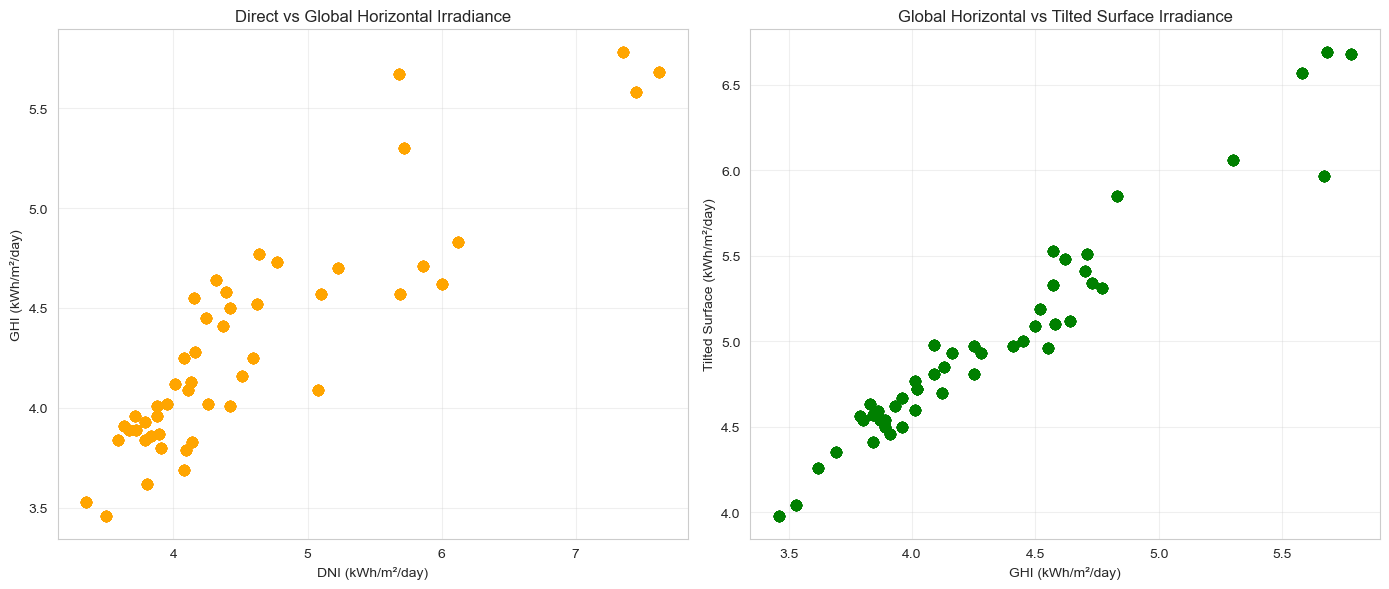



TOP 10 STATES BY AVERAGE WIND SPEED


             annual_dni_value  annual_ghi_value
state                                          
Alabama              4.556939          4.311429
Alaska               4.556939          4.311429
Arizona              4.556939          4.311429
Arkansas             4.556939          4.311429
California           4.556939          4.311429
Colorado             4.556939          4.311429
Connecticut          4.556939          4.311429
Delaware             4.556939          4.311429
Florida              4.556939          4.311429
Georgia              4.556939          4.311429


In [59]:
# Solar radiation comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# DNI vs GHI
axes[0].scatter(df['annual_dni_value'], df['annual_ghi_value'], alpha=0.6, s=50, c='orange')
axes[0].set_xlabel('DNI (kWh/m²/day)')
axes[0].set_ylabel('GHI (kWh/m²/day)')
axes[0].set_title('Direct vs Global Horizontal Irradiance')
axes[0].grid(alpha=0.3)

# GHI vs Tilt
axes[1].scatter(df['annual_ghi_value'], df['annual_tilt_value'], alpha=0.6, s=50, c='green')
axes[1].set_xlabel('GHI (kWh/m²/day)')
axes[1].set_ylabel('Tilted Surface (kWh/m²/day)')
axes[1].set_title('Global Horizontal vs Tilted Surface Irradiance')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

state_avg = df.groupby('state').agg({
    'avg_wind_speed': 'mean',
    'annual_dni_value': 'mean',
    'annual_ghi_value': 'mean'
}).round(2)

# Geographic analysis - average values by state
state_avg = df.groupby('state').agg({
    'annual_dni_value': 'mean',
    'annual_ghi_value': 'mean'
})
print("\n" )
print("TOP 10 STATES BY AVERAGE WIND SPEED")
print("\n")
print(state_avg.head(10))

In [60]:
# -------------------------------------------------
# Compute Average Wind Speed (Feature Engineering)
# -------------------------------------------------
df['avg_wind_speed'] = df[
    ['wind_speed_50m', 'wind_speed_100m', 'wind_speed_150m']
].mean(axis=1)

# -------------------------------------------------
# State-wise Aggregation
# -------------------------------------------------
state_avg = (
    df.groupby('state', as_index=True)
      .agg({
          'avg_wind_speed': 'mean',
          'annual_dni_value': 'mean',
          'annual_ghi_value': 'mean'
      })
      .round(2)
)

print(state_avg.head())


            avg_wind_speed  annual_dni_value  annual_ghi_value
state                                                         
Alabama               5.49              4.56              4.31
Alaska                5.43              4.56              4.31
Arizona               3.54              4.56              4.31
Arkansas              5.51              4.56              4.31
California            3.16              4.56              4.31


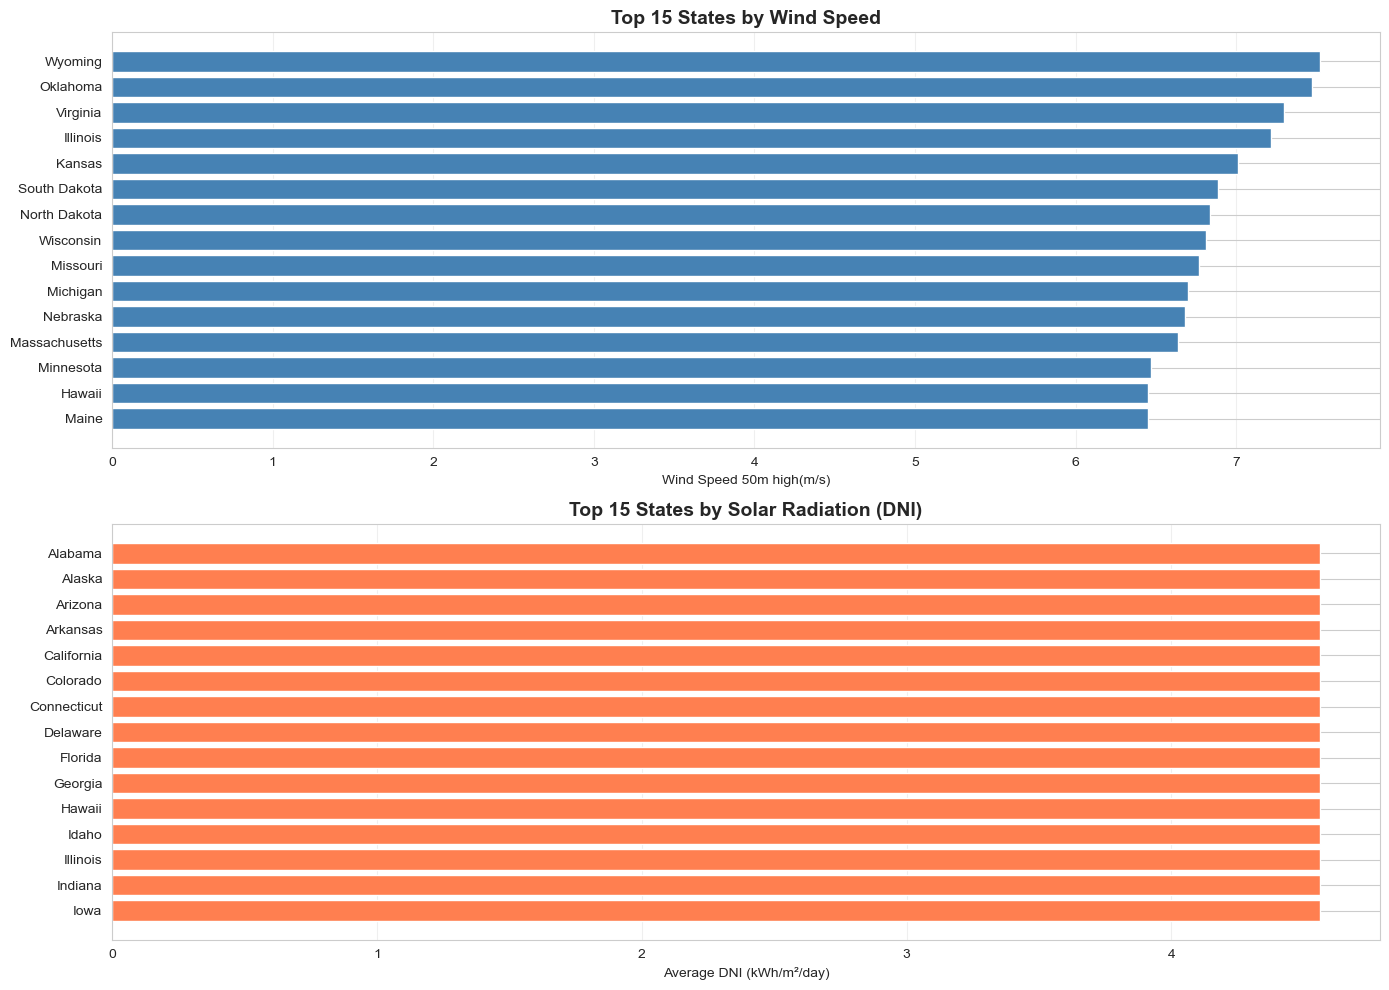

In [61]:
# Visualize top states
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Top 15 states by wind speed
top_wind = state_avg.sort_values('avg_wind_speed', ascending=False).head(15)
axes[0].barh(top_wind.index, top_wind['avg_wind_speed'], color='steelblue')
axes[0].set_xlabel('Wind Speed 50m high(m/s)')
axes[0].set_title('Top 15 States by Wind Speed', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Top 15 states by solar radiation (DNI)
top_solar = state_avg.sort_values('annual_dni_value', ascending=False).head(15)
axes[1].barh(top_solar.index, top_solar['annual_dni_value'], color='coral')
axes[1].set_xlabel('Average DNI (kWh/m²/day)')
axes[1].set_title('Top 15 States by Solar Radiation (DNI)', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


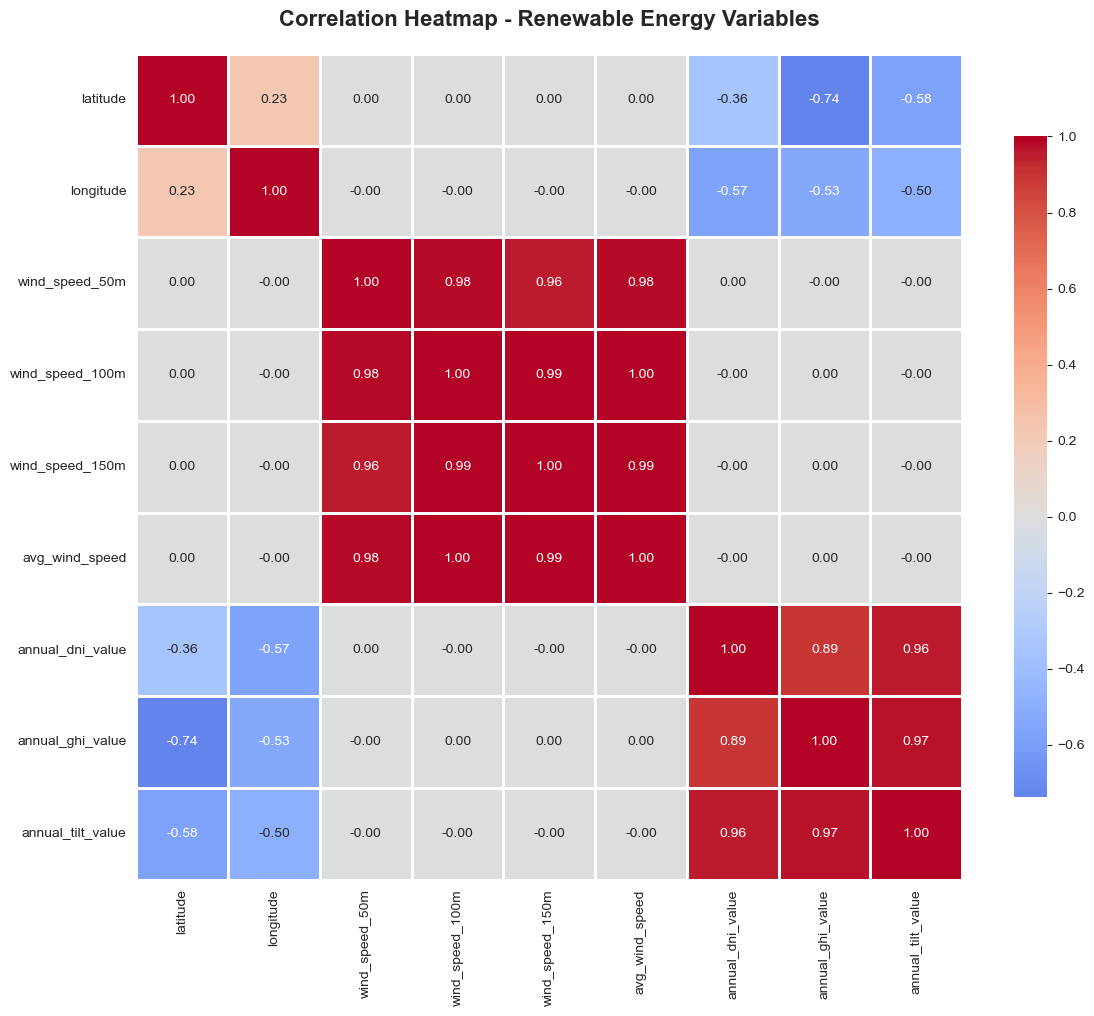



KEY CORRELATIONS IDENTIFIED:


      Variable 1        Variable 2  Correlation
 wind_speed_100m    avg_wind_speed     0.999516
 wind_speed_100m   wind_speed_150m     0.993958
 wind_speed_150m    avg_wind_speed     0.993432
  wind_speed_50m    avg_wind_speed     0.984780
  wind_speed_50m   wind_speed_100m     0.981727
annual_ghi_value annual_tilt_value     0.971923
  wind_speed_50m   wind_speed_150m     0.958858
annual_dni_value annual_tilt_value     0.956854
annual_dni_value  annual_ghi_value     0.885993
        latitude  annual_ghi_value    -0.738106


In [62]:
# SECTION 9: CORRELATION ANALYSIS
# Calculate correlation matrix for numerical variables
numerical_features = ['latitude', 'longitude', 'wind_speed_50m', 'wind_speed_100m',
                      'wind_speed_150m', 'avg_wind_speed', 'annual_dni_value',
                      'annual_ghi_value', 'annual_tilt_value']

correlation_matrix = df[numerical_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Renewable Energy Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n")
print("KEY CORRELATIONS IDENTIFIED:")
print("\n")

# Find strong correlations (excluding self-correlations)
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_corr.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlation', ascending=False)
print(strong_corr_df.to_string(index=False))

In [63]:
# SECTION 10: OUTLIER DETECTION AND TREATMENT
print("\n")
print("OUTLIER ANALYSIS USING IQR METHOD")
print("\n")

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in key variables
outlier_summary = []
for col in numerical_features:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Variable': col,
        'Outlier Count': len(outliers),
        'Percentage': f"{(len(outliers)/len(df))*100:.2f}%",
        'Lower Bound': f"{lower:.2f}",
        'Upper Bound': f"{upper:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))



OUTLIER ANALYSIS USING IQR METHOD


         Variable  Outlier Count Percentage Lower Bound Upper Bound
         latitude             50      2.04%       24.57       52.99
        longitude             50      2.04%     -123.89      -53.55
   wind_speed_50m             49      2.00%        2.90        6.90
  wind_speed_100m            147      6.00%        3.71        8.47
  wind_speed_150m            147      6.00%        4.40        9.34
   avg_wind_speed            147      6.00%        3.88        8.03
 annual_dni_value            200      8.16%        2.55        6.10
 annual_ghi_value            150      6.12%        2.86        5.62
annual_tilt_value            150      6.12%        3.46        6.42


In [65]:
# SECTION 11: FEATURE ENGINEERING

print("CREATING NEW FEATURES")
print("\n")

# Wind speed increase rate (percentage increase per 50m height)
df['wind_speed_increase_rate'] = ((df['wind_speed_150m'] - df['wind_speed_50m']) /
                                   df['wind_speed_50m'] * 100)

# Solar potential index (combination of all solar metrics)
df['solar_potential_index'] = (df['annual_dni_value'] + df['annual_ghi_value'] +
                                df['annual_tilt_value']) / 3

# Combined renewable potential score (normalized)
df['renewable_score'] = (df['avg_wind_speed'] / df['avg_wind_speed'].max() * 50 +
                         df['solar_potential_index'] / df['solar_potential_index'].max() * 50)

print("New features created:")
print("1. wind_speed_increase_rate - Rate of wind speed increase with height")
print("2. solar_potential_index - Average of all solar radiation metrics")
print("3. renewable_score - Combined renewable energy potential (0-100)")

print("\nTop 10 locations by renewable energy potential:")
top_renewable = df.nlargest(10, 'renewable_score')[['state', 'renewable_score',
                                                      'avg_wind_speed', 'solar_potential_index']]
print(top_renewable.to_string(index=False))

CREATING NEW FEATURES


New features created:
1. wind_speed_increase_rate - Rate of wind speed increase with height
2. solar_potential_index - Average of all solar radiation metrics
3. renewable_score - Combined renewable energy potential (0-100)

Top 10 locations by renewable energy potential:
   state  renewable_score  avg_wind_speed  solar_potential_index
 Wyoming       100.000000        7.524518               6.663333
Oklahoma        99.635507        7.469665               6.663333
 Wyoming        99.549775        7.524518               6.603333
Oklahoma        99.185282        7.469665               6.603333
 Wyoming        99.024512        7.524518               6.533333
Oklahoma        98.660020        7.469665               6.533333
Virginia        98.508878        7.300118               6.663333
Virginia        98.058653        7.300118               6.603333
Illinois        97.999686        7.223490               6.663333
Illinois        97.549460        7.223490             

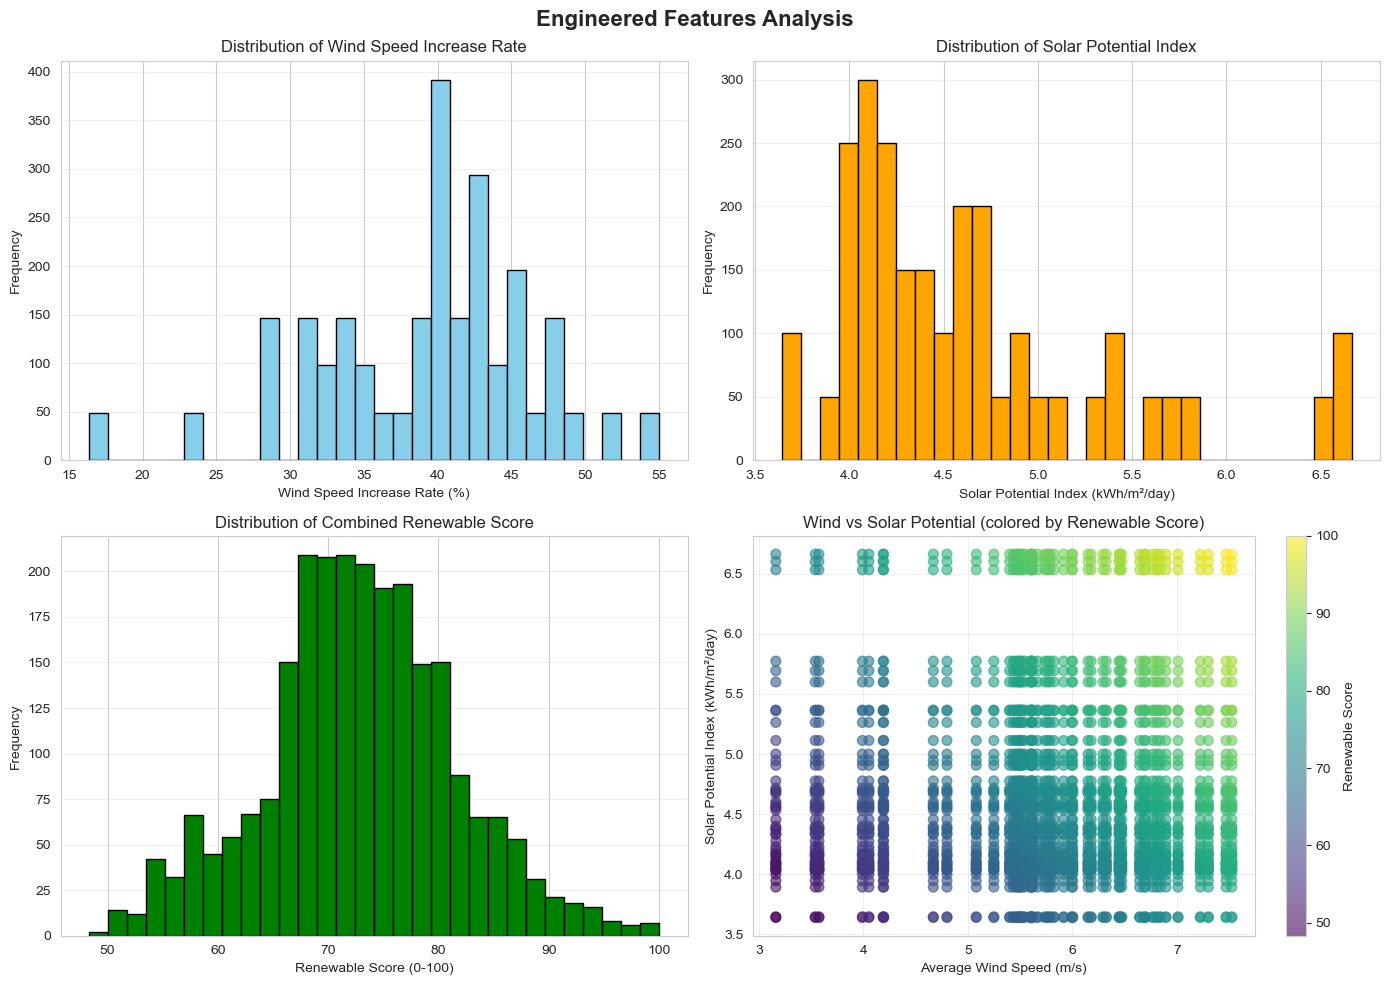

In [67]:
# SECTION 12: VISUALIZATION OF ENGINEERED FEATURES
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Engineered Features Analysis', fontsize=16, fontweight='bold')

# Wind speed increase rate distribution
axes[0, 0].hist(df['wind_speed_increase_rate'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Wind Speed Increase Rate (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Wind Speed Increase Rate')
axes[0, 0].grid(axis='y', alpha=0.3)

# Solar potential index distribution
axes[0, 1].hist(df['solar_potential_index'].dropna(), bins=30, color='orange', edgecolor='black')
axes[0, 1].set_xlabel('Solar Potential Index (kWh/m²/day)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Solar Potential Index')
axes[0, 1].grid(axis='y', alpha=0.3)

# Renewable score distribution
axes[1, 0].hist(df['renewable_score'].dropna(), bins=30, color='green', edgecolor='black')
axes[1, 0].set_xlabel('Renewable Score (0-100)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Combined Renewable Score')
axes[1, 0].grid(axis='y', alpha=0.3)

# Scatter: Wind vs Solar potential
axes[1, 1].scatter(df['avg_wind_speed'], df['solar_potential_index'],
                   alpha=0.6, s=50, c=df['renewable_score'], cmap='viridis')
axes[1, 1].set_xlabel('Average Wind Speed (m/s)')
axes[1, 1].set_ylabel('Solar Potential Index (kWh/m²/day)')
axes[1, 1].set_title('Wind vs Solar Potential (colored by Renewable Score)')
axes[1, 1].grid(alpha=0.3)
cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
cbar.set_label('Renewable Score')

plt.tight_layout()
plt.show()

### Export Cleaned Dataset and Features

In [68]:
# Export cleaned dataset
df.to_csv("cleaned_renewable_data.csv", index=False)

# Export ML-ready dataset
ml_columns = [
    'latitude', 'longitude',
    'avg_wind_speed',
    'solar_potential_index',
    'wind_speed_increase_rate',
    'renewable_score'
]

df[ml_columns].dropna().to_csv("renewable_energy_ml_features.csv", index=False)

print("Datasets exported successfully.")


Datasets exported successfully.


### **KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS**

**1. DATA QUALITY:**
   - Total records: 53
   - Duplicates removed: 0
   - Missing values: Minimal impact after handling JSON columns


**2. WIND ENERGY INSIGHTS:**
   - Average wind speed increases with height (50m→150m)
   - Mean wind speed at 50m: 4.74 m/s
   - Mean wind speed at 150m: 6.63 m/s
   - States with highest wind potential: Wyoming, Oklahoma, Virginia


**3. SOLAR ENERGY INSIGHTS:**
   - Average DNI: 4.51 kWh/m²/day
   - Average GHI: 4.29 kWh/m²/day
   - States with highest solar potential: Nevada, New Mexico, Arizona


**4. CORRELATIONS:**
   - Strong positive correlation between wind speeds at different heights
   - Moderate correlation between different solar radiation metrics
   - Latitude shows correlation with solar radiation patterns


**5. OUTLIERS:**
   - Some extreme values detected in wind speeds (likely measurement errors)
   - Solar radiation values are generally consistent with geographic patterns


**6. FEATURE ENGINEERING:**
   - Created renewable potential score combining wind and solar
   - Identified optimal locations for hybrid renewable energy projects
   

### Time Series Analysis and Growth Rate Calculations

The dataset used in this project is cross-sectional and does not contain explicit
temporal attributes such as year or time. Therefore, traditional time-series
forecasting and growth rate calculations (e.g., CAGR) are not applicable.
Instead, comparative, correlation-based, and feature-driven analyses are performed.
